# 1.Data wrangling

In [2]:
import sys
print(sys.version)
print(sys.executable) # check the environment

3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
D:\Users\punyung\anaconda3\python.exe


In [ ]:
#install pacckage
!pip install pandas
!pip list
!pip install numpy

In [18]:
import pandas as pd
import numpy as np

# Task1.1: Create a DataFrame named df with 6 nrows with the following columns:

# define the number of rows
nrows = 6

# define the data for the DataFrame
data = {
    'A': np.random.rand(nrows),
    'B': np.random.choice(["test","train"],nrows),
    'C':np.random.randint(1,100,nrows),
    'D':pd.Series(np.random.randint(1,100,nrows)),
    'E':pd.date_range(start='2021-01-01',periods=nrows,freq='M')
}

# Create the DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)


          A      B   C   D          E
0  0.620107   test  52  74 2021-01-31
1  0.913084   test  36  19 2021-02-28
2  0.932422  train   2  44 2021-03-31
3  0.453451   test  31  59 2021-04-30
4  0.784750   test  48  68 2021-05-31
5  0.366991   test  15  34 2021-06-30


In [19]:
# Task1.2: Convert numeric columns into a numpy.matrix and compute the row sums.

# Select the numeric columns of the DataFrame
numeric_columns = df.select_dtypes(include=[np.number])

# Convert the numeric columns into a numpy matrix
matrix = numeric_columns.to_numpy()

# Compute the row sums
row_sums = np.sum(matrix, axis=1)

# Print the row sums
print(row_sums)

[126.620107    55.91308351  46.9324215   90.45345074 116.78474955
  49.36699056]


In [20]:
# Task1.3 Sort df by column C

# Sort df by column C (ascending order)
df_sorted = df.sort_values('C')

# Print the sorted DataFrame
print(df_sorted)

          A      B   C   D          E
2  0.932422  train   2  44 2021-03-31
5  0.366991   test  15  34 2021-06-30
3  0.453451   test  31  59 2021-04-30
1  0.913084   test  36  19 2021-02-28
4  0.784750   test  48  68 2021-05-31
0  0.620107   test  52  74 2021-01-31


In [21]:
#Task1.4 Filter df for entries for which B has value train and C has values greater than 0

# Filter df based on the conditions
filtered_df = df[(df['B'] == 'train') & (df['C'] > 0)]

# Print the filtered DataFrame
print(filtered_df)

          A      B  C   D          E
2  0.932422  train  2  44 2021-03-31


In [22]:
#Task1.5 Change the value in the 4th column and 2nd row to 10.
# Change the value to 10
df.iloc[1, 3] = 10

# Print the modified DataFrame
print(df)

          A      B   C   D          E
0  0.620107   test  52  74 2021-01-31
1  0.913084   test  36  10 2021-02-28
2  0.932422  train   2  44 2021-03-31
3  0.453451   test  31  59 2021-04-30
4  0.784750   test  48  68 2021-05-31
5  0.366991   test  15  34 2021-06-30


In [23]:
#Task1.6 Create a column F where half the values are NaN.

# Calculate the number of rows in the DataFrame
num_rows = df.shape[0]

# Create an array of NaN values with half the length of the DataFrame
nan_values = np.empty(num_rows // 2)
nan_values[:] = np.nan

# Assign the NaN values to column F
df['F'] = np.concatenate([nan_values, np.zeros(num_rows - len(nan_values))])

# Print the updated DataFrame
print(df)

          A      B   C   D          E    F
0  0.620107   test  52  74 2021-01-31  NaN
1  0.913084   test  36  10 2021-02-28  NaN
2  0.932422  train   2  44 2021-03-31  NaN
3  0.453451   test  31  59 2021-04-30  0.0
4  0.784750   test  48  68 2021-05-31  0.0
5  0.366991   test  15  34 2021-06-30  0.0


In [24]:
# Task1.7 Deal with missing values in two different ways:

#1.remove entries with missing data
#2.fill missing values with 0

# Remove entries with missing data
df_without_missing = df.dropna()

# Fill missing values with 0
df_filled_with_zero = df.fillna(0)

# Print the DataFrames after handling missing values
print("DataFrame without missing data:")
print(df_without_missing)

print("\nDataFrame with missing values filled with 0:")
print(df_filled_with_zero)

DataFrame without missing data:
          A     B   C   D          E    F
3  0.453451  test  31  59 2021-04-30  0.0
4  0.784750  test  48  68 2021-05-31  0.0
5  0.366991  test  15  34 2021-06-30  0.0

DataFrame with missing values filled with 0:
          A      B   C   D          E    F
0  0.620107   test  52  74 2021-01-31  0.0
1  0.913084   test  36  10 2021-02-28  0.0
2  0.932422  train   2  44 2021-03-31  0.0
3  0.453451   test  31  59 2021-04-30  0.0
4  0.784750   test  48  68 2021-05-31  0.0
5  0.366991   test  15  34 2021-06-30  0.0


In [25]:
#Task1.8 Convert column A into a cumulative sum.
# Convert column A into a cumulative sum
df['A_cumulative_sum'] = df['A'].cumsum()

# Print the modified DataFrame
print(df)

          A      B   C   D          E    F  A_cumulative_sum
0  0.620107   test  52  74 2021-01-31  NaN          0.620107
1  0.913084   test  36  10 2021-02-28  NaN          1.533191
2  0.932422  train   2  44 2021-03-31  NaN          2.465612
3  0.453451   test  31  59 2021-04-30  0.0          2.919063
4  0.784750   test  48  68 2021-05-31  0.0          3.703812
5  0.366991   test  15  34 2021-06-30  0.0          4.070803


In [ ]:
#Task1.9 Subtract column A from column B
df['B_minus_A'] = df['B'] - df['A']

# Print the modified DataFrame
print(df)

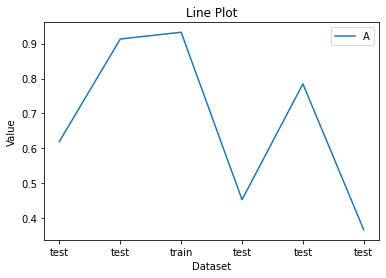

In [31]:
#Task1.10 Plot the numeric columns as a line plot, ensuring that the plot has proper labels.
# Plot the numeric columns as a line plot
import matplotlib.pyplot as plt
df.plot(x='B',y='A',kind='line')
plt.xlabel('Dataset')
plt.ylabel('Value')
plt.title('Line Plot')

# Show the plot
plt.show()

In [32]:
#Task1.11 Compute the mean values of each column for groups train and test.
# Group the DataFrame by the "B" column and calculate the mean values for each group
grouped_means = df.groupby("B").mean()

# Display the mean values
print(grouped_means)

              A     C     D    F  A_cumulative_sum
B                                                 
test   0.627676  36.4  49.0  0.0          2.569395
train  0.932422   2.0  44.0  NaN          2.465612


In [50]:
# Task1.12 Convert dataframe 

#Convert the following DataFrame from a into b (long to wide).

a = pd.DataFrame(
    {"value": [1, 2, 3, 4, 5, 6], "group": ["a", "a", "a", "b", "b", "b"]}
)
print(a)

# Convert from long to wide format
b = a.pivot(columns="group", values="value")

print(b)

# Additionally, convert from b into a (wide to long).
b = pd.DataFrame(
    {"a": [1, 2, 3], "b": [4, 5, 6]}
)
print(b)
# Convert from wide to long format
a = b.melt(var_name='group', value_name='value')
print(a)

   value group
0      1     a
1      2     a
2      3     a
3      4     b
4      5     b
5      6     b
group    a    b
0      1.0  NaN
1      2.0  NaN
2      3.0  NaN
3      NaN  4.0
4      NaN  5.0
5      NaN  6.0
   a  b
0  1  4
1  2  5
2  3  6
  group  value
0     a      1
1     a      2
2     a      3
3     b      4
4     b      5
5     b      6
